# Parkinsons

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data = pd.read_csv("parkinsons.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
data.drop(['name'],axis=1,inplace= True)
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Spliting Data for training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_Data=data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']]
y_Data=data[['status']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2,random_state=42)

# Decision Trees

In [6]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



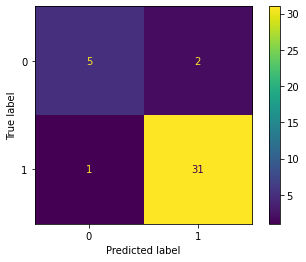

In [7]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT))


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



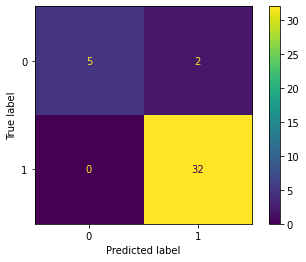

In [9]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test)

              precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39



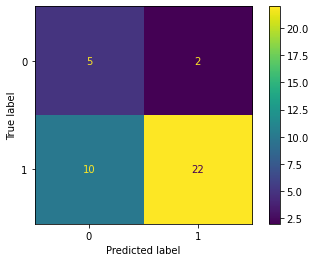

In [11]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



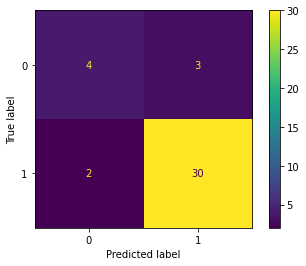

In [13]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

#scaler.fit(y_train)
#y_test_normalized = scaler.transform(y_test)

# K-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



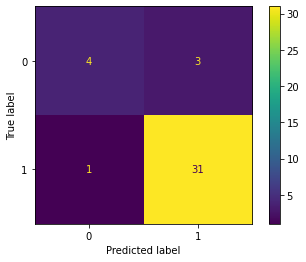

In [16]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [17]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability= True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



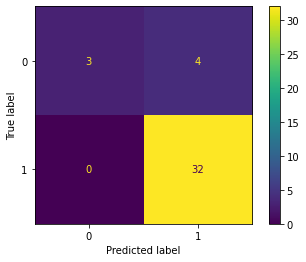

In [18]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [19]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



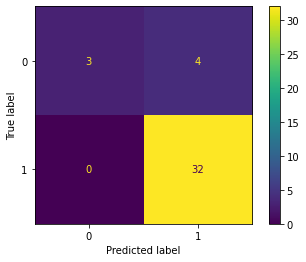

In [20]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [21]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



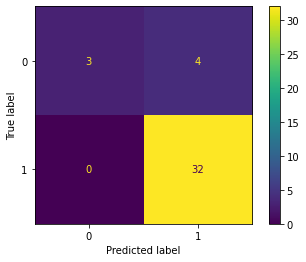

In [22]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))

# ROC and AUC 

In [23]:
r_probs =[0 for _ in range(len(y_test))]
dt_probs=modelDT.predict_proba(X_test)
rf_probs=modelRFC.predict_proba(X_test)
nb_probs=modelGNB.predict_proba(X_test)
ada_probs=modelAda.predict_proba(X_test)
knn_probs=modelKNN.predict_proba(X_test_normalized)
svm_probs=modelSVC.predict_proba(X_test_normalized)
lsvm_probs=modelLSVC._predict_proba_lr(X_test_normalized)
mlp_probs=modelMLP.predict_proba(X_test_normalized)

In [24]:
dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:, 1]
nb_probs=nb_probs[:, 1]
ada_probs=ada_probs[:, 1]
knn_probs=knn_probs[:, 1]
svm_probs=svm_probs[:, 1]
lsvm_probs=lsvm_probs[:, 1]
mlp_probs=mlp_probs[:, 1]

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
r_auc=roc_auc_score(y_test,r_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)
nb_auc= roc_auc_score(y_test,nb_probs)
ada_auc= roc_auc_score(y_test,ada_probs)
knn_auc= roc_auc_score(y_test,knn_probs)
svm_auc= roc_auc_score(y_test,svm_probs)
lsvm_auc= roc_auc_score(y_test,lsvm_probs)
mlp_auc= roc_auc_score(y_test,mlp_probs)

In [27]:
r_fpr,r_tpr, _ = roc_curve(y_test,r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test,dt_probs)
rf_fpr, rf_tpr, _= roc_curve(y_test,rf_probs)
nb_fpr, nb_tpr, _= roc_curve(y_test,nb_probs)
ada_fpr, ada_tpr, _= roc_curve(y_test,ada_probs)
knn_fpr, knn_tpr, _= roc_curve(y_test,knn_probs)
svm_fpr, svm_tpr, _= roc_curve(y_test,svm_probs)
lsvm_fpr, lsvm_tpr, _= roc_curve(y_test,lsvm_probs)
mlp_fpr, mlp_tpr, _= roc_curve(y_test,mlp_probs)

In [28]:
import matplotlib.pyplot as plt

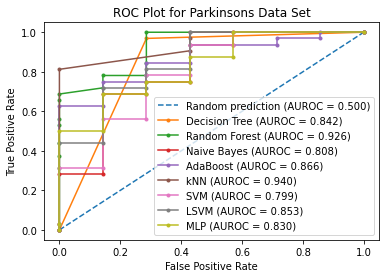

In [29]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN (AUROC = %0.3f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lsvm_fpr, lsvm_tpr, marker='.', label='LSVM (AUROC = %0.3f)' % lsvm_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot for Parkinsons Data Set')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()